# traintestdiff example

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from traintestdiff import *

For the example we're going to use the **Tips** dataset provided by Seaborn

In [3]:
tips = sns.load_dataset("tips")
print("Tips dataset shape is", tips.shape)
tips.head(5)

Tips dataset shape is (244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


For creating our datasets dict we use sklearn ``train_test_split``, because of that we don't 
expect to see great differences.

In [4]:
train, test = train_test_split(tips, test_size=0.33, random_state=42)

We're going to explore the distribution differences between **train** and **test** set

In [5]:
datasets = {'train': train, 'test': test }

ttd = TrainTestDiff(datasets)

## Categorical Features Exploration

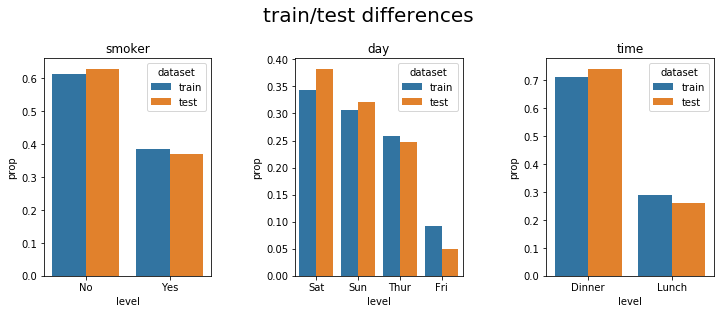

In [16]:
longform_cat, fig1 = ttd.plot_cat_diff(features=['smoker', 'day', 'time'], kind="prop")

## Continuous Features Exploration

Now we're going to explore the difference of continuous features on **train** and **test** sets. ``plot_cont_diff`` offers different kinds of graph to choose from, like: point, bar, box, violin, strip. In the following examples we show: box and bar.

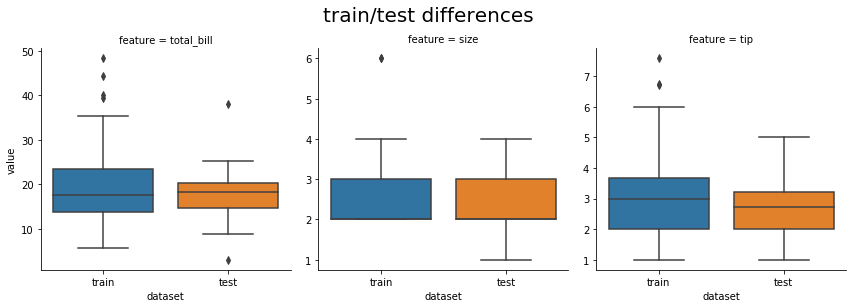

In [7]:
longform_cont1, fig2 = ttd.plot_cont_diff(features=["total_bill", "size", "tip"], kind="box")

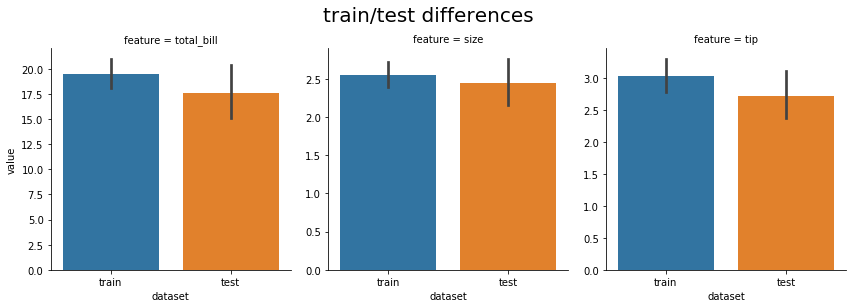

In [8]:
longform_cont2, fig3 = ttd.plot_cont_diff(features=["total_bill", "size", "tip"], kind="bar")

## Long form data and figures

As you can see ``plot_cont_diff`` and ``plot_cat_diff`` returns a ``pandas.DataFrame`` and a ``matplotlib.figure.Figure`` the idea is to give you the data in a tidy form so you can continue your exploration. For info about this form look: [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [10]:
longform_cat.head()

,level,count,feature,dataset,prop
0,No,100,smoker,train,0.613497
1,Yes,63,smoker,train,0.386503
0,Sat,56,day,train,0.343558
1,Sun,50,day,train,0.306748
2,Thur,42,day,train,0.257669


In [11]:
longform_cont1.head()

,dataset,feature,value
0,train,total_bill,16.99
1,train,total_bill,10.34
2,train,total_bill,21.01
3,train,total_bill,23.68
4,train,total_bill,24.59


Accessing the figure we can modify the style with our knowledge of matplotlib

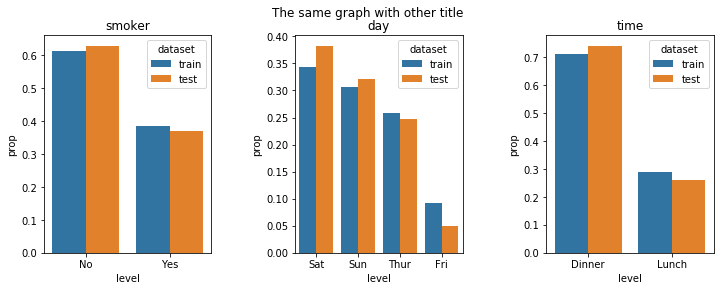

In [14]:
fig1.suptitle("The same graph with other title")
fig1